In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Mejoramiento de datos 

In [140]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [141]:
def optimizar(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    theta = (x_train.T @ (sigma-y_train))
    return theta

In [142]:
def costo(theta, x_train, y_train):
    
    sigma = sigmoid(x_train@theta)
    error = (y_train*np.log(sigma) + (1-y_train)*np.log(1-sigma))
    return np.sum(error, axis= 0)

In [143]:
def costo(theta, x_train, y_train):
    
    sigma = sigmoid(x_train@theta)
    error = (y_train*np.log(sigma) + (1-y_train)*np.log(1-sigma))
    return np.sum(error, axis= 0)

# Data 

In [144]:
iris = datasets.load_iris()

In [145]:
X = iris["data"][::]
y = (iris["target"]).astype(int).reshape(len(iris.target),1)

# Estandarizacion

In [146]:
for i in range(X.shape[1]):
    mean = X[:,i].mean()
    deviation =  X[:,i].std()
    X[:,i] = (X[:,i] - mean) / deviation

# Separacion de datos de testeo y entrenamiento 

In [147]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, random_state=55)

In [148]:
def exclude_data(class_vector, num_exclude):
    vectores = []

    for i in range(len(class_vector)):
        if class_vector[i] != num_exclude:
            vectores.append(i)

    return np.array(vectores)  

In [149]:
def gradiente(theta, x_train, y_train, eta = 0.8, n_iter = 10000):
    J = np.zeros(n_iter)
    m = len(x_train)
    for i in range(n_iter):
        J[i] = -(1/m)*costo(theta, x_train, y_train)
        theta = theta - eta * (1/m)*optimizar(theta, x_train, y_train)
    return theta, J

In [150]:
def  vector_comparacion(y_proba_1, y_proba_2, y_proba_1_value, y_proba_2_value):
    comparar = np.concatenate((y_proba_1, y_proba_2), axis =0).T
    prediction_final = []
    for i in range(len(comparar)):
        #print(compar[i])
        valor_max = comparar[i].max()
        #print(compar[i].max())
        if comparar[i][0] == valor_max:
            prediction_final.append(y_proba_1_value)
        elif comparar[i][1] == valor_max:
            prediction_final.append(y_proba_2_value)

    prediction_final = np.array(prediction_final).reshape(1, len(prediction_final))
    last_data = np.concatenate((y_proba_1, y_proba_2, prediction_final), axis =0).T
    return last_data, prediction_final.T


A = setosa
B = versicolor
C = virginica

# AB

Primero busco los indices de todos los valores excepto del virginica

In [151]:
X_AB = exclude_data(y_train, 2)
X_AB

array([  0,   1,   4,   5,   6,   7,   9,  10,  11,  12,  13,  14,  18,
        21,  22,  24,  25,  26,  27,  28,  29,  30,  32,  34,  36,  38,
        39,  40,  41,  43,  44,  45,  49,  50,  53,  54,  56,  57,  58,
        59,  60,  63,  64,  65,  66,  67,  70,  72,  73,  74,  75,  76,
        78,  82,  83,  85,  86,  88,  90,  92,  93,  94,  96,  97,  98,
        99, 100, 101, 102, 105, 106, 107, 109, 110, 111, 113, 114, 115,
       116, 117, 119])

In [152]:
X_train_AB = X_train[X_AB]
y_train_AB = y_train[X_AB]


In [153]:
X_train_AB = np.c_[np.ones((len(X_train_AB),1)), X_train_AB]
X_test_AB = np.c_[np.ones((len(X_test),1)), X_test]

In [154]:
n_iter = 10000

theta_setosa_AB = np.random.randn(X_train_AB.shape[1]).reshape(X_train_AB.shape[1],1)
y_train_set_AB = (y_train_AB == 0).astype(int)

theta_setosa_AB, J_set = gradiente(theta_setosa_AB, X_train_AB, y_train_set_AB)
theta_setosa_AB

array([[-4.99638541],
       [-2.23829873],
       [ 4.68806939],
       [-3.9268372 ],
       [-3.98411997]])

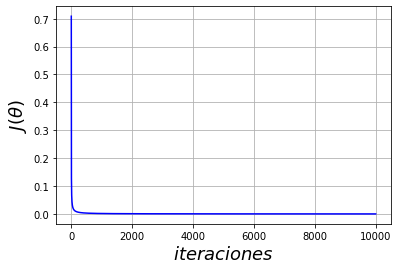

In [155]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [156]:
y_proba_set_AB =np.round(sigmoid(theta_setosa_AB.T @ X_test_AB.T),2)
y_proba_set_AB

array([[1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.66, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [157]:
n_iter = 10000
theta_versicolor_AB = np.random.randn(X_train_AB.shape[1]).reshape(X_train_AB.shape[1],1)
y_train_ver_AB = (y_train_AB == 1).astype(int)

theta_versicolor_AB, J_vers = gradiente(theta_versicolor_AB, X_train_AB, y_train_ver_AB)
theta_versicolor_AB

array([[ 4.98977786],
       [ 2.60733648],
       [-4.94489212],
       [ 3.57305575],
       [ 4.00183371]])

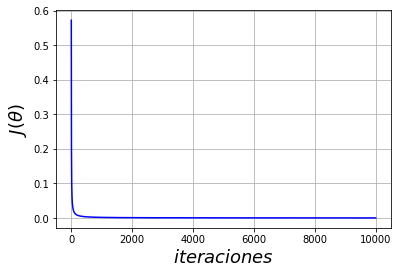

In [158]:
plt.plot(np.arange(n_iter), J_vers, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [159]:
y_proba_ver_AB =np.round(sigmoid(theta_versicolor_AB.T @ X_test_AB.T),2)
y_proba_ver_AB

array([[0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  ,
        1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.41, 1.  , 1.  , 0.99, 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]])

In [160]:
last_data_AB, votar_AB = vector_comparacion(y_proba_set_AB,y_proba_ver_AB, 0 ,1)
last_data_AB

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.66, 0.41, 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 0.99, 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ]])

# AC

In [161]:
X_AC = exclude_data(y_train, 1)
X_AC

array([  0,   1,   2,   3,   4,   7,   8,  11,  13,  15,  16,  17,  18,
        19,  20,  21,  23,  25,  26,  28,  29,  31,  32,  33,  35,  36,
        37,  38,  39,  40,  41,  42,  44,  45,  46,  47,  48,  51,  52,
        53,  54,  55,  57,  60,  61,  62,  65,  68,  69,  70,  71,  73,
        74,  75,  76,  77,  79,  80,  81,  83,  84,  87,  88,  89,  91,
        94,  95,  97,  99, 101, 103, 104, 107, 108, 111, 112, 115, 117,
       118, 119])

In [162]:
X_train_AC = X_train[X_AC]
y_train_AC = y_train[X_AC]

In [163]:
X_train_AC = np.c_[np.ones((len(X_train_AC),1)), X_train_AC]
X_test_AC = np.c_[np.ones((len(X_test),1)), X_test]

In [164]:
n_iter = 10000

theta_setosa_AC = np.random.randn(X_train_AC.shape[1]).reshape(X_train_AC.shape[1],1)
y_train_set_AC = (y_train_AC == 0).astype(int)

theta_setosa_AC, J_set = gradiente(theta_setosa_AC, X_train_AC, y_train_set_AC)
theta_setosa_AC

array([[-1.48059991],
       [-1.21780301],
       [ 1.98729506],
       [-3.37832531],
       [-4.34052929]])

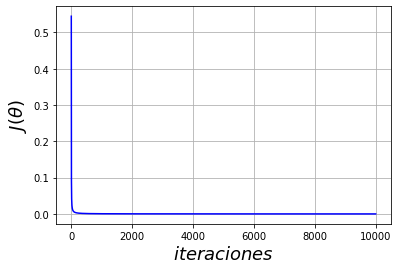

In [165]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [166]:
y_proba_set_AC =np.round(sigmoid(theta_setosa_AC.T @ X_test_AC.T),2)
y_proba_set_AC

array([[1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.01, 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.03, 0.  , 0.02, 0.  ,
        0.01, 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  ]])

In [167]:
n_iter = 10000
theta_virginica_AC = np.random.randn(X_train_AC.shape[1]).reshape(X_train_AC.shape[1],1)
y_train_ver_AC = (y_train_AC == 2).astype(int)

theta_virginica_AC, J_vir = gradiente(theta_virginica_AC, X_train_AC, y_train_ver_AC)
theta_virginica_AC

array([[ 1.7383804 ],
       [ 1.50160502],
       [-2.14064097],
       [ 3.73888078],
       [ 3.63020655]])

In [168]:
y_proba_vir_AC =np.round(sigmoid(theta_virginica_AC.T @ X_test_AC.T),2)
y_proba_vir_AC

array([[0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  ,
        0.99, 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.98, 1.  , 0.98, 1.  ,
        0.99, 1.  , 1.  , 0.99, 1.  , 1.  , 1.  , 1.  ]])

In [169]:
last_data_AC, votar_AC = vector_comparacion(y_proba_set_AC,y_proba_vir_AC, 0 ,2)
last_data_AC

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.99, 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.03, 0.98, 2.  ],
       [0.  , 1.  , 2.  ],
       [0.02, 0.98, 2.  ],
       [0.  , 1.  , 2.  ],
       [0.01, 0.99, 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.02, 0.99, 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ]])

# BC

In [170]:
X_BC = exclude_data(y_train, 0)
X_BC

array([  2,   3,   5,   6,   8,   9,  10,  12,  14,  15,  16,  17,  19,
        20,  22,  23,  24,  27,  30,  31,  33,  34,  35,  37,  42,  43,
        46,  47,  48,  49,  50,  51,  52,  55,  56,  58,  59,  61,  62,
        63,  64,  66,  67,  68,  69,  71,  72,  77,  78,  79,  80,  81,
        82,  84,  85,  86,  87,  89,  90,  91,  92,  93,  95,  96,  98,
       100, 102, 103, 104, 105, 106, 108, 109, 110, 112, 113, 114, 116,
       118])

In [171]:
X_train_BC = X_train[X_BC]
y_train_BC = y_train[X_BC]

In [172]:
X_train_BC = np.c_[np.ones((len(X_train_BC),1)), X_train_BC]
X_test_BC = np.c_[np.ones((len(X_test),1)), X_test]
X_train_BC.shape

(79, 5)

In [173]:
n_iter = 10000

theta_versicolor_BC = np.random.randn(X_train_BC.shape[1]).reshape(X_train_BC.shape[1],1)
y_train_set_BC = (y_train_BC == 1).astype(int)

theta_versicolor_BC, J_set = gradiente(theta_versicolor_BC, X_train_BC, y_train_set_BC)
theta_versicolor_BC

array([[ 13.45624041],
       [  2.83328901],
       [  1.09457353],
       [-12.83456586],
       [-10.16304803]])

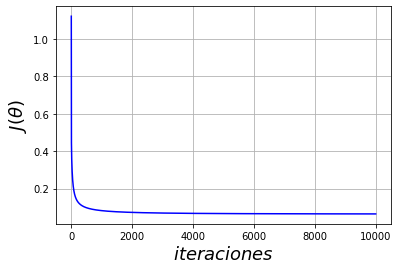

In [174]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [175]:
y_proba_ver_BC =np.round(sigmoid(theta_versicolor_BC.T @ X_test_BC.T),2)
y_proba_ver_BC

array([[1.  , 1.  , 1.  , 0.01, 0.  , 1.  , 0.  , 0.01, 1.  , 1.  , 1.  ,
        0.95, 0.  , 1.  , 0.  , 0.16, 1.  , 1.  , 1.  , 0.  , 0.98, 0.  ,
        0.91, 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.99]])

In [176]:
n_iter = 10000
theta_virginica_BC = np.random.randn(X_train_BC.shape[1]).reshape(X_train_BC.shape[1],1)
y_train_ver_BC = (y_train_BC == 2).astype(int)

theta_virginica_BC, J_vir = gradiente(theta_virginica_BC, X_train_BC, y_train_ver_BC)
theta_virginica_BC

array([[-13.45620429],
       [ -2.83388877],
       [ -1.09424691],
       [ 12.83620427],
       [ 10.16193173]])

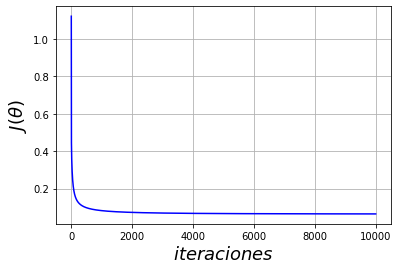

In [177]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [179]:
y_proba_vir_BC =np.round(sigmoid(theta_virginica_BC.T @ X_test_BC.T),2)
y_proba_vir_BC

array([[0.  , 0.  , 0.  , 0.99, 1.  , 0.  , 1.  , 0.99, 0.  , 0.  , 0.  ,
        0.05, 1.  , 0.  , 1.  , 0.84, 0.  , 0.  , 0.  , 1.  , 0.02, 1.  ,
        0.09, 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.01]])

In [180]:
last_data_BC, votar_BC = vector_comparacion(y_proba_ver_BC,y_proba_vir_BC, 1 ,2)
last_data_BC

array([[1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.01, 0.99, 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [0.01, 0.99, 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.95, 0.05, 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [0.16, 0.84, 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [0.98, 0.02, 1.  ],
       [0.  , 1.  , 2.  ],
       [0.91, 0.09, 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [0.99, 0.01, 1.  ]])

In [181]:
votar_AB.T, votar_AC.T, votar_BC.T, y_test.T

(array([[0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]]),
 array([[0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2]]),
 array([[1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
         1, 2, 1, 1, 2, 1, 2, 1]]),
 array([[0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2,
         1, 2, 1, 1, 2, 1, 2, 1]]))

In [182]:
vote_data = np.concatenate((votar_AB, votar_AC, votar_BC), axis =1)
vote_data

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1]])

In [183]:
data = []

for i in range(len(vote_data)):   
    values, votes = np.unique(vote_data[i], return_counts=True)
    index_winner = votes.argmax()
    data.append(values[index_winner])
data = np.array(data)
np.concatenate((data.reshape(len(data), 1), y_test), axis =1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [2, 2],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0],
       [2, 2],
       [2, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [1, 1]])

In [184]:
cm = confusion_matrix(y_test , data)
cm

array([[ 9,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 11]], dtype=int64)

In [185]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total


0.9666666666666667

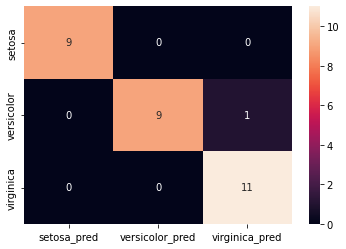

In [186]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
cm = confusion_matrix(y_test , data)
f = sns.heatmap(cm, annot=True,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [187]:
print(classification_report(y_test, data, target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.90      0.95        10
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

